In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pycaret

In [7]:
df=pd.read_csv('heart-copy1.zip')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
from pycaret.classification import *

In [12]:
s=setup(data=df,target='target',train_size=0.6)

Setup Succesfully Completed!


,Description,Value
0,session_id,6781
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(303, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8567,0.8964,0.8989,0.8577,0.8748,0.7067,0.7134,0.0749
1,Random Forest Classifier,0.8178,0.8749,0.8278,0.8430,0.8325,0.6319,0.6370,0.1336
2,Ridge Classifier,0.8129,0.0000,0.8689,0.8135,0.8362,0.6188,0.6277,0.0173
3,Linear Discriminant Analysis,0.8073,0.8875,0.8689,0.8059,0.8319,0.6071,0.6176,0.0112
4,CatBoost Classifier,0.8067,0.8996,0.8167,0.8365,0.8215,0.6084,0.6179,6.2582
5,Extreme Gradient Boosting,0.8012,0.8860,0.8278,0.8269,0.8211,0.5969,0.6070,0.0974
6,Light Gradient Boosting Machine,0.8012,0.8767,0.8278,0.8182,0.8198,0.5974,0.6035,0.0730
7,Gradient Boosting Classifier,0.7956,0.8874,0.8267,0.8072,0.8122,0.5869,0.5949,0.1901
8,Extra Trees Classifier,0.7845,0.8818,0.8267,0.7954,0.8080,0.5604,0.5652,0.4386
9,Ada Boost Classifier,0.7798,0.8217,0.8389,0.7943,0.8077,0.5525,0.5678,0.2031


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6781, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### creating models

In [16]:
logistic_reg=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.8000,0.8000,0.8000,0.8000,0.5778,0.5778
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9444,0.9125,1.0000,0.9091,0.9524,0.8861,0.8919
3,0.9444,0.9875,0.9000,1.0000,0.9474,0.8889,0.8944
4,0.9444,0.9125,1.0000,0.9091,0.9524,0.8861,0.8919
5,0.6667,0.8625,0.9000,0.6429,0.7500,0.2895,0.3287
6,0.7222,0.7625,0.8000,0.7273,0.7619,0.4304,0.4332
7,0.8333,0.9125,0.8000,0.8889,0.8421,0.6667,0.6708
8,0.8889,0.9625,0.9000,0.9000,0.9000,0.7750,0.7750
9,0.8333,0.8519,0.8889,0.8000,0.8421,0.6667,0.6708


In [14]:
decision_tree=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.7333,0.8000,0.7273,0.7619,0.4693,0.4719
1,0.8889,0.9000,0.8000,1.0000,0.8889,0.7805,0.8000
2,0.6667,0.6875,0.5000,0.8333,0.6250,0.3571,0.3953
3,0.7222,0.7000,0.9000,0.6923,0.7826,0.4156,0.4438
4,0.6111,0.5875,0.8000,0.6154,0.6957,0.1818,0.1941
5,0.7222,0.7000,0.9000,0.6923,0.7826,0.4156,0.4438
6,0.6111,0.5750,0.9000,0.6000,0.7200,0.1600,0.2000
7,0.7778,0.7875,0.7000,0.8750,0.7778,0.5610,0.5750
8,0.7778,0.8000,0.6000,1.0000,0.7500,0.5714,0.6325
9,0.6111,0.6111,0.5556,0.6250,0.5882,0.2222,0.2236


In [15]:
random_forest=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.8278,0.8000,0.8000,0.8000,0.5778,0.5778
1,0.8889,0.9188,0.8000,1.0000,0.8889,0.7805,0.8000
2,0.8889,0.8875,0.9000,0.9000,0.9000,0.7750,0.7750
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.7222,0.8500,0.8000,0.7273,0.7619,0.4304,0.4332
5,0.7778,0.8375,0.9000,0.7500,0.8182,0.5385,0.5534
6,0.7778,0.8188,0.8000,0.8000,0.8000,0.5500,0.5500
7,0.7778,0.9125,0.8000,0.8000,0.8000,0.5500,0.5500
8,0.7778,0.9062,0.7000,0.8750,0.7778,0.5610,0.5750
9,0.7778,0.7901,0.7778,0.7778,0.7778,0.5556,0.5556


In [17]:
K_NN=create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6316,0.6556,0.8000,0.6154,0.6957,0.2486,0.2626
1,0.6667,0.6312,0.7000,0.7000,0.7000,0.3250,0.3250
2,0.3889,0.4938,0.5000,0.4545,0.4762,-0.2532,-0.2548
3,0.6111,0.7250,0.7000,0.6364,0.6667,0.2025,0.2039
4,0.7222,0.7000,0.8000,0.7273,0.7619,0.4304,0.4332
5,0.6667,0.6438,0.8000,0.6667,0.7273,0.3077,0.3162
6,0.6667,0.8062,0.8000,0.6667,0.7273,0.3077,0.3162
7,0.5556,0.6812,0.6000,0.6000,0.6000,0.1000,0.1000
8,0.7222,0.7438,0.8000,0.7273,0.7619,0.4304,0.4332
9,0.5556,0.6605,0.6667,0.5455,0.6000,0.1111,0.1140


In [ ]:
# we can use other models also these are just for comparision with normal program

### Model Tuning

In [18]:
# tune models
tune_logistic_reg=tune_model(logistic_reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.7889,0.8000,0.8000,0.8000,0.5778,0.5778
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.9000,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.9444,0.9750,0.9000,1.0000,0.9474,0.8889,0.8944
4,0.9444,0.9125,1.0000,0.9091,0.9524,0.8861,0.8919
5,0.6667,0.8250,0.9000,0.6429,0.7500,0.2895,0.3287
6,0.7222,0.7875,0.8000,0.7273,0.7619,0.4304,0.4332
7,0.8333,0.9125,0.8000,0.8889,0.8421,0.6667,0.6708
8,0.8889,0.9625,0.9000,0.9000,0.9000,0.7750,0.7750
9,0.7778,0.8395,0.8889,0.7273,0.8000,0.5556,0.5698


In [23]:
print(tune_logistic_reg)

LogisticRegression(C=3.62, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=6781, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [19]:
tune_decision_tree=tune_model(decision_tree)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7368,0.8111,0.8000,0.7273,0.7619,0.4693,0.4719
1,0.8333,0.8625,0.8000,0.8889,0.8421,0.6667,0.6708
2,0.6111,0.7312,0.5000,0.7143,0.5882,0.2410,0.2548
3,0.7222,0.6688,0.8000,0.7273,0.7619,0.4304,0.4332
4,0.6667,0.6250,0.8000,0.6667,0.7273,0.3077,0.3162
5,0.7778,0.7875,0.8000,0.8000,0.8000,0.5500,0.5500
6,0.6667,0.7250,0.7000,0.7000,0.7000,0.3250,0.3250
7,0.7778,0.8688,0.7000,0.8750,0.7778,0.5610,0.5750
8,0.6111,0.7250,0.4000,0.8000,0.5333,0.2588,0.3051
9,0.7222,0.7469,0.7778,0.7000,0.7368,0.4444,0.4472


In [24]:
print(tune_decision_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6781, splitter='best')


In [20]:
tune_random_forest=tune_model(random_forest)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7895,0.8444,0.8000,0.8000,0.8000,0.5778,0.5778
1,0.9444,0.9750,0.9000,1.0000,0.9474,0.8889,0.8944
2,0.7778,0.9000,0.8000,0.8000,0.8000,0.5500,0.5500
3,0.9444,0.9500,1.0000,0.9091,0.9524,0.8861,0.8919
4,0.8333,0.9000,0.9000,0.8182,0.8571,0.6582,0.6625
5,0.9444,0.9125,1.0000,0.9091,0.9524,0.8861,0.8919
6,0.6111,0.7500,0.8000,0.6154,0.6957,0.1818,0.1941
7,0.7778,0.9125,0.8000,0.8000,0.8000,0.5500,0.5500
8,0.7222,0.9375,0.6000,0.8571,0.7059,0.4578,0.4842
9,0.7222,0.8272,0.7778,0.7000,0.7368,0.4444,0.4472


In [25]:
print(tune_random_forest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=6781, verbose=0,
                       warm_start=False)


In [22]:
tune_knn=tune_model(K_NN)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4737,0.5778,0.6000,0.5000,0.5455,-0.0674,-0.0690
1,0.7778,0.8812,0.8000,0.8000,0.8000,0.5500,0.5500
2,0.5556,0.7312,0.6000,0.6000,0.6000,0.1000,0.1000
3,0.8333,0.9000,0.9000,0.8182,0.8571,0.6582,0.6625
4,0.7778,0.8000,0.9000,0.7500,0.8182,0.5385,0.5534
5,0.5556,0.5750,0.7000,0.5833,0.6364,0.0769,0.0791
6,0.6667,0.6375,0.9000,0.6429,0.7500,0.2895,0.3287
7,0.6667,0.8438,0.7000,0.7000,0.7000,0.3250,0.3250
8,0.6667,0.7500,0.8000,0.6667,0.7273,0.3077,0.3162
9,0.4444,0.7963,0.7778,0.4667,0.5833,-0.1111,-0.1491


In [26]:
print(tune_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')


### plot

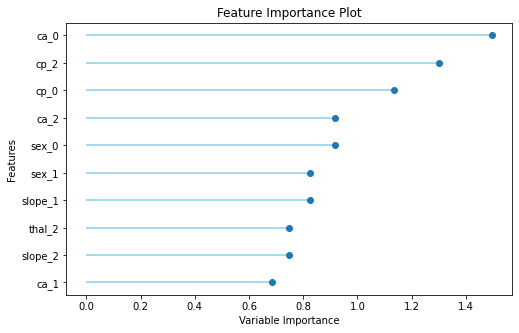

In [29]:
plot_model(tune_logistic_reg, plot='feature')

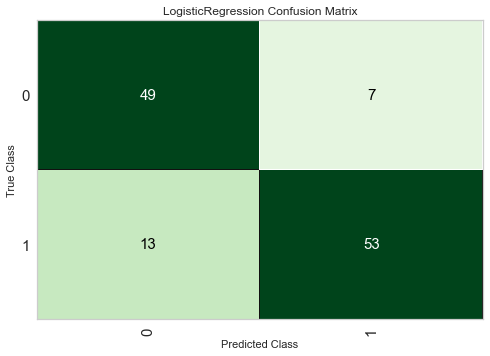

In [30]:
plot_model(tune_logistic_reg, plot = 'confusion_matrix')

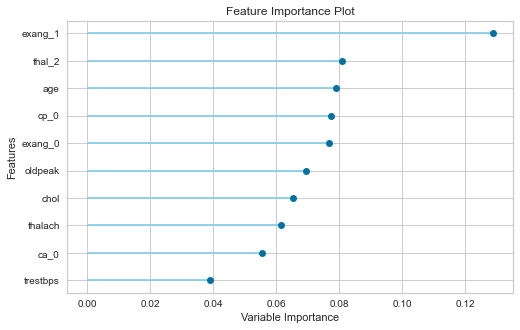

In [31]:
plot_model(tune_random_forest, plot='feature')

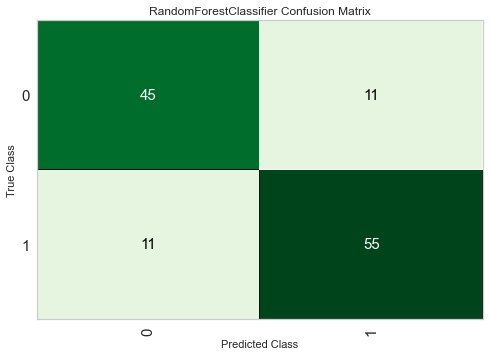

In [32]:
plot_model(tune_random_forest, plot = 'confusion_matrix')

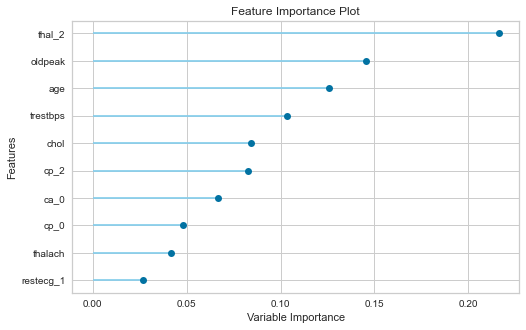

In [33]:
plot_model(tune_decision_tree, plot='feature')

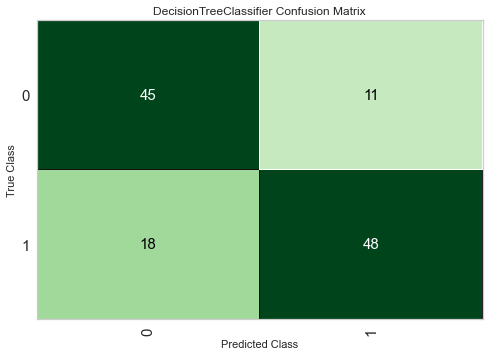

In [34]:
plot_model(tune_decision_tree, plot = 'confusion_matrix')

### Predicted values

In [36]:
predict1=predict_model(tune_logistic_reg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8361,0.9286,0.803,0.8833,0.8413,0.6726,0.6758


In [37]:
predict1.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target,Label,Score
0,59.0,135.0,234.0,161.0,0.5,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.2108
1,68.0,118.0,277.0,151.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.4684
2,41.0,105.0,198.0,168.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9346
3,45.0,130.0,234.0,175.0,0.6,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9193
4,54.0,120.0,188.0,113.0,1.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0132


In [38]:
predict2=predict_model(tune_decision_tree)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7623,0.7963,0.7273,0.8136,0.768,0.5259,0.5293


In [47]:
predict2.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target,Label,Score
0,59.0,135.0,234.0,161.0,0.5,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.0000
1,68.0,118.0,277.0,151.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0000
2,41.0,105.0,198.0,168.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.3333
3,45.0,130.0,234.0,175.0,0.6,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1.0000
4,54.0,120.0,188.0,113.0,1.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0000


In [40]:
predict3=predict_model(tune_random_forest)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8197,0.9137,0.8333,0.8333,0.8333,0.6369,0.6369


In [41]:
predict3.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target,Label,Score
0,59.0,135.0,234.0,161.0,0.5,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.5567
1,68.0,118.0,277.0,151.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.4344
2,41.0,105.0,198.0,168.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.7894
3,45.0,130.0,234.0,175.0,0.6,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8656
4,54.0,120.0,188.0,113.0,1.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.3803


In [42]:
predict4=predict_model(tune_knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6885,0.7569,0.803,0.6795,0.7361,0.3625,0.3701


In [43]:
predict4.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target,Label,Score
0,59.0,135.0,234.0,161.0,0.5,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.60
1,68.0,118.0,277.0,151.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.52
2,41.0,105.0,198.0,168.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.84
3,45.0,130.0,234.0,175.0,0.6,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.88
4,54.0,120.0,188.0,113.0,1.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.48
